In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [5]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
ture_w, ture_b = torch.ones((num_inputs, 1))*0.01, 0.05
train_data = d2l.synthetic_data(ture_w, true_b, num_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [7]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1),requires_grad=True)
    b = torch.ones(1,requires_grad=True)
    return [w, b]

In [8]:
def l2_penelty(w):
    return torch.sum(w.pow(2)) / 2

In [14]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss',yscale='log',
                           xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l2_penelty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
            if (epoch + 1) % 5 == 0:
                animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

w的L2范数是： 12.383020401000977


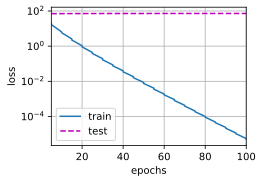

In [15]:
train(lambd=0)

w的L2范数是： 0.4572676122188568


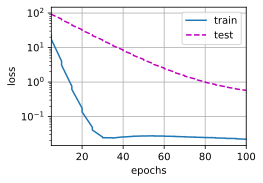

In [16]:
train(lambd=3)

In [23]:
#简介实现
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 12.927630424499512


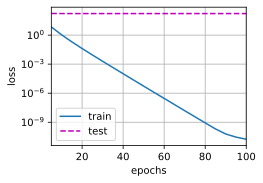

In [24]:
train_concise(0)

w的L2范数： 0.39886030554771423


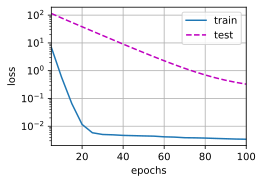

In [25]:
train_concise(3)